# Your first deep neural network

CIFAR : https://www.cs.toronto.edu/~kriz/cifar.html

# imports

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving requirements.txt to requirements.txt


In [ ]:
!ls

requirements.txt  sample_data


In [ ]:
!pip install -r requirements.txt

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-sagekr3q
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-sagekr3q
     |████████████████████████████████| 102kB 5.4MB/s 
     |████████████████████████████████| 163kB 16.5MB/s 
     |████████████████████████████████| 706kB 16.4MB/s 
     |████████████████████████████████| 10.6MB 16.0MB/s 
     |████████████████████████████████| 2.8MB 42.9MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 
     |████████████████████████████████| 778kB 42.4MB/s 
     |████████████████████████████████| 112kB 51.6MB/s 
     |████████████████████████████████| 184kB 43.8MB/s 
     |████████████████████████████████| 133kB 49.1MB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 133kB 34.3MB/s 
     |████████████████████████████████| 317kB 42.9MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |██████████

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

# data

In [ ]:
NUM_CLASSES = 10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

The
first dimension of this array references the index of the image in the dataset, the second
and third relate to the size of the image, and the last is the channel (i.e., red,
green, or blue, since these are RGB images). There are no columns or rows in this
dataset; instead, this is a tensor with four dimensions. For example, the following
entry refers to the green channel (1) value of the pixel in the (12,13) position of
image 54:

In [ ]:
x_train[54, 12, 13, 1] 

94

# architecture



---


The Input layer is an entry point into the network. We tell the network the 
shape of
each data element to expect as a tuple. Notice that we do not specify the batch size.Next we flatten this input into a vector, using a Flatten layer. This results in a vector
of length 3,072 (= 32 × 32 × 3). The subsequent
Dense layer requires flat input rather than a multidimensional array. Other layer types require multidimensional arrays as input, so you need
to be aware of the required input and output shape of each layer type to understand when it is necessary to use Flatten.



---
Dense layer. Every unit is connected to units from previous layer densely.
Every unit in the layer is connected to every unit in the previous layer,  through a single connection that carries a weight (which can be positive or negative). The output from a given unit is the weighted sum of the input it receives from the previous
layer, which is then passed through a nonlinear activation function before being sent
to the following layer. The activation function is critical to ensure the neural network
is able to learn complex functions and doesn’t just output a linear combination of its
input.

---




In [ ]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [ ]:
#to see the shape of the network at each layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________




---



Keras uses None as a marker to show that it doesn’t yet know the number
of observations that will be passed into the network.That’s because tensor operations are conducted across all observations simultaneously
using linear algebra—this is the part handled by TensorFlow. It is also the reason why
you get a performance increase when training deep neural networks on GPUs instead
of CPUs: GPUs are optimized for large tensor multiplications since these calculations
are also necessary for complex graphics manipulation



---
The summary method also gives the number of parameters (weights) that will be
trained at each layer. If ever you find that your model is training too slowly, check the
summary to see if there are any layers that contain a huge number of weights. If so,
you should consider whether the number of units in the layer could be reduced to
speed up training



---




# train

In [ ]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



---

Optimizer is the algorithm that will be used to update the weights in the nn based on the gradient of the loss function
lr is the learning rate. The greater the learning rate, the larger the greater the change in weights at each step. Training may be faster with large lr, but it may result in less stable training and may not find the minima of the loss function. 

---


Loss function is used by nn to compare its predicted output to the ground truth. Returns a single number for each observaton, the greater the number , the worse the network has performed for this observation.


---



In [ ]:
model.fit(x_train
          , y_train
          , batch_size=32 # Number of observations passed at each step.Large size results in stable gradient calculation but computationaly intensive. 32,256 preferred. Recommended to increase as training progresses
          , epochs=10    # how many times the network will be shown full training data
          , shuffle=True # batches will be drawn randomly without replacement at each training step
          )

W1004 03:49:46.639931 140232695744384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1004 03:49:46.693361 140232695744384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 17s 341us/step - loss: 1.8486 - acc: 0.3346
Epoch 2/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.6633 - acc: 0.4064
Epoch 3/10
50000/50000 [==============================] - 17s 334us/step - loss: 1.5922 - acc: 0.4303
Epoch 4/10
50000/50000 [==============================] - 17s 337us/step - loss: 1.5371 - acc: 0.4517
Epoch 5/10
50000/50000 [==============================] - 17s 333us/step - loss: 1.4976 - acc: 0.4660
Epoch 6/10
50000/50000 [==============================] - 16s 325us/step - loss: 1.4663 - acc: 0.4773
Epoch 7/10
50000/50000 [==============================] - 17s 332us/step - loss: 1.4414 - acc: 0.4861
Epoch 8/10
50000/50000 [==============================] - 17s 333us/step - loss: 1.4123 - acc: 0.4971
Epoch 9/10
50000/50000 [==============================] - 17s 333us/step - loss: 1.3939 - acc: 0.5031
Epoch 10/10
50000/50000 [==============================] - 17s 336us/step - loss: 



---
First the weights of the networks are initialized to random values. Then the network performs a series of training steps. At each training step, one batch of images (determined by batch size parameter) is passed through the network and the errors are back propagated to update the weights. This continues until all the observations in the dataset have been seen once. This completes the first epoch. This process repeats until the specified number of epochs have elapsed.


---
Keras outputs the progress of the procedure.  

Epoch 1/10
50000/50000 [==============================] - 17s 341us/step - loss: 1.8486 - acc: 0.3346  
Epoch 2/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.6633 - acc: 0.4064  
 Further progress until the last step  
Epoch 10/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.3728 - acc: 0.5111

Training dataset of 50,000 observations has been shown to the network
10 times (i.e., over 10 epochs), at a rate of ~340 microseconds per
observation. The categorical cross-entropy loss has fallen from 1.8486 to 1.3728, resulting
in an accuracy increase from 33% after the first epoch to 51% after the tenth
epoch


# analysis

In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/step


[1.4906271579742432, 0.4756]

Evaluation results in 47.5% accuracy on unseen data.   
if the model was guessing randomly, it
would achieve approximately 10% accuracy (because there are 10 classes),        so 50% is a
good result given that we have used a very basic neural network.


---



In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

#view some of the predictions on the test set using the predict method
preds = model.predict(x_test)  # An array of shape [10000,10] - a vector of 10 class probabilites for each observation
preds_single = CLASSES[np.argmax(preds, axis = -1)] # Conver array of probabilites into single prediction. Now the shape is (10000,1)
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

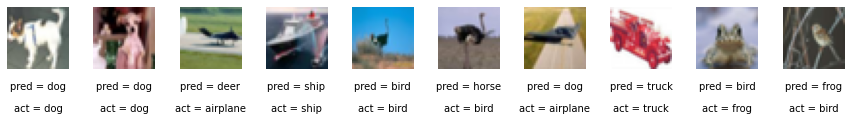

In [ ]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
